# 回归诊断

### 黄荣贵（复旦大学社会学系）

## 帽子矩阵与杠杆值

In [1]:
library(car)

# linear regression model
Prestige10 <- Prestige[1:10,]
m <- lm(prestige ~ income + women, data = Prestige10)

# leverage
hatvalues(m)

Loading required package: carData


gov.administrators    general.managers         accountants purchasing.officers 
          0.1160462           0.9214977           0.1933013           0.1480221 
           chemists          physicists          biologists          architects 
          0.1557975           0.1450753           0.6359373           0.1676625 
    civil.engineers    mining.engineers 
          0.2511544           0.2655056

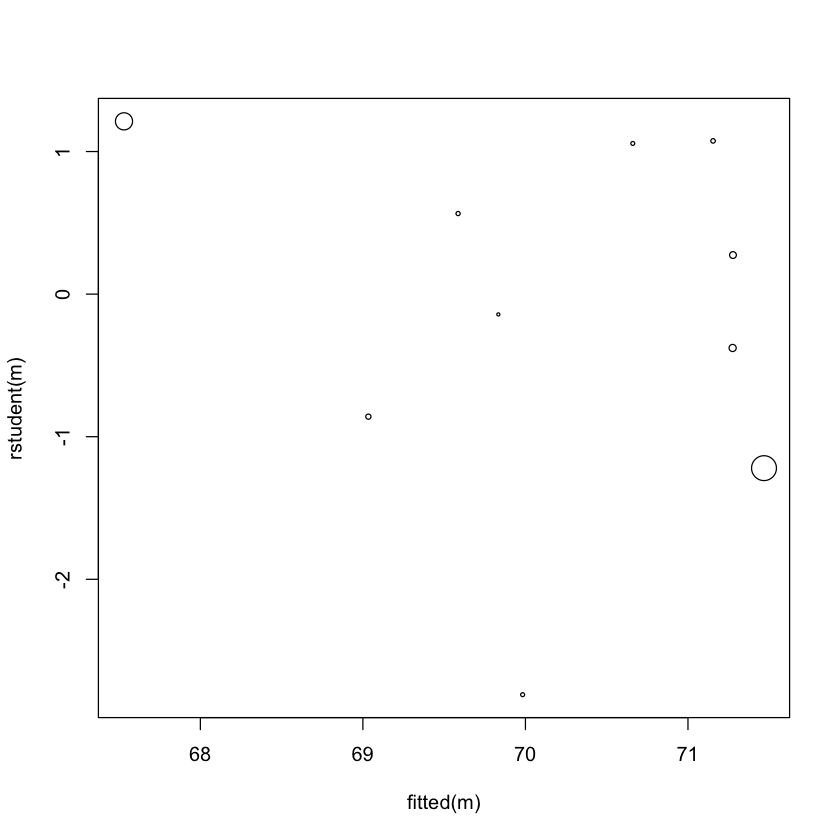

In [2]:
plot(fitted(m), rstudent(m), cex = hatvalues(m) * 3)

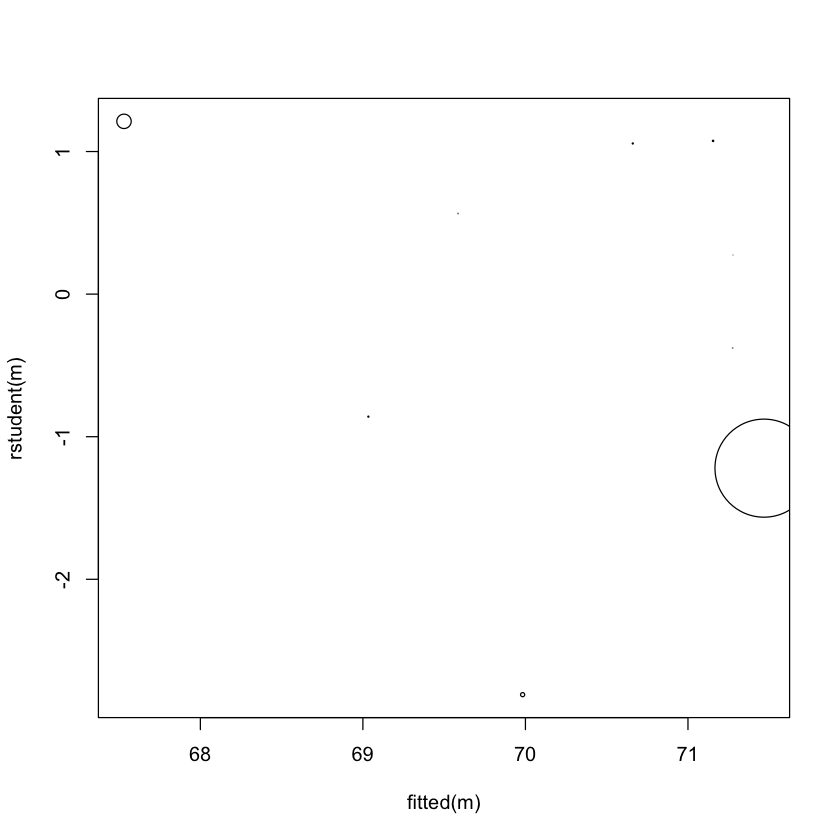

In [3]:
plot(fitted(m), rstudent(m), cex = cooks.distance(m) * 2)

手工计算帽子矩阵和杠杆值

In [4]:
X <- model.matrix(m)

H <- X %*% solve(crossprod(X)) %*% t(X)

H

,gov.administrators,general.managers,accountants,purchasing.officers,chemists,physicists,biologists,architects,civil.engineers,mining.engineers
gov.administrators,0.11604618,0.141034220,0.127734881,0.08641252,0.09942951,0.073493229,0.18200532,0.07459105,0.05077885,0.04847424
general.managers,0.14103422,0.921497705,-0.009367755,-0.09650713,-0.10137857,0.001827933,0.02035635,0.17521423,-0.01483075,-0.03784624
accountants,0.12773488,-0.009367755,0.193301311,0.11721508,0.14931536,0.061830317,0.31454484,0.02080880,0.01214626,0.01247090
purchasing.officers,0.08641252,-0.096507126,0.117215078,0.14802213,0.14561395,0.129305042,0.09587992,0.08986810,0.13918685,0.14500354
chemists,0.09942951,-0.101378572,0.149315362,0.14561395,0.15579751,0.109420431,0.17781326,0.06179020,0.09866970,0.10352865
physicists,0.07349323,0.001827933,0.061830317,0.12930504,0.10942043,0.145075328,-0.02319443,0.13602806,0.18084049,0.18537360
biologists,0.18200532,0.020356346,0.314544844,0.09587992,0.17781326,-0.023194427,0.63593733,-0.08646473,-0.15600695,-0.16087092
architects,0.07459105,0.175214234,0.020808799,0.08986810,0.06179020,0.136028056,-0.08646473,0.16766247,0.18010115,0.18040066
civil.engineers,0.05077885,-0.014830748,0.012146262,0.13918685,0.09866970,0.180840494,-0.15600695,0.18010115,0.25115443,0.25795996
mining.engineers,0.04847424,-0.037846235,0.012470901,0.14500354,0.10352865,0.185373597,-0.16087092,0.18040066,0.25795996,0.26550561


In [5]:
X %*% solve( t(X) %*% X ) %*% t(X)

,gov.administrators,general.managers,accountants,purchasing.officers,chemists,physicists,biologists,architects,civil.engineers,mining.engineers
gov.administrators,0.11604618,0.141034220,0.127734881,0.08641252,0.09942951,0.073493229,0.18200532,0.07459105,0.05077885,0.04847424
general.managers,0.14103422,0.921497705,-0.009367755,-0.09650713,-0.10137857,0.001827933,0.02035635,0.17521423,-0.01483075,-0.03784624
accountants,0.12773488,-0.009367755,0.193301311,0.11721508,0.14931536,0.061830317,0.31454484,0.02080880,0.01214626,0.01247090
purchasing.officers,0.08641252,-0.096507126,0.117215078,0.14802213,0.14561395,0.129305042,0.09587992,0.08986810,0.13918685,0.14500354
chemists,0.09942951,-0.101378572,0.149315362,0.14561395,0.15579751,0.109420431,0.17781326,0.06179020,0.09866970,0.10352865
physicists,0.07349323,0.001827933,0.061830317,0.12930504,0.10942043,0.145075328,-0.02319443,0.13602806,0.18084049,0.18537360
biologists,0.18200532,0.020356346,0.314544844,0.09587992,0.17781326,-0.023194427,0.63593733,-0.08646473,-0.15600695,-0.16087092
architects,0.07459105,0.175214234,0.020808799,0.08986810,0.06179020,0.136028056,-0.08646473,0.16766247,0.18010115,0.18040066
civil.engineers,0.05077885,-0.014830748,0.012146262,0.13918685,0.09866970,0.180840494,-0.15600695,0.18010115,0.25115443,0.25795996
mining.engineers,0.04847424,-0.037846235,0.012470901,0.14500354,0.10352865,0.185373597,-0.16087092,0.18040066,0.25795996,0.26550561


In [6]:
hvs <- apply(H, 1, function(x) sum(x^2))

hvs

gov.administrators    general.managers         accountants purchasing.officers 
          0.1160462           0.9214977           0.1933013           0.1480221 
           chemists          physicists          biologists          architects 
          0.1557975           0.1450753           0.6359373           0.1676625 
    civil.engineers    mining.engineers 
          0.2511544           0.2655056

## 强影响点诊断

In [7]:
cooks.distance(m)

gov.administrators    general.managers         accountants purchasing.officers 
        0.001030479         5.447790478         0.061263039         0.230292487 
           chemists          physicists          biologists          architects 
        0.021766042         0.062115084         0.801381444         0.075868313 
    civil.engineers    mining.engineers 
        0.009672929         0.019587064

dfbeta 仅考虑系数变化量

In [8]:
dfbeta(m)

,(Intercept),income,women
gov.administrators,0.01424091,-5.838140e-06,-0.006970316
general.managers,22.23170259,-1.889203e-03,-0.282442853
accountants,-0.31099619,2.733194e-05,-0.082314946
purchasing.officers,-4.93894603,2.396062e-04,0.057572003
chemists,1.19390998,-6.532792e-05,0.006629060
physicists,2.50532194,-8.413058e-05,-0.077927617
biologists,-3.49735343,7.503756e-05,0.457445231
architects,1.41858358,1.541362e-05,-0.088397419
civil.engineers,1.06055989,-3.542540e-05,-0.044749113
mining.engineers,-1.56640875,5.546039e-05,0.064344997


dfbetas 考虑系数变化量及对应标准误

In [9]:
dfbetas(m)

,(Intercept),income,women
gov.administrators,0.001613103,-0.01066494,-0.01896812
general.managers,2.808803683,-3.84934745,-0.85728858
accountants,-0.037269022,0.05282303,-0.23698421
purchasing.officers,-0.849810010,0.66488334,0.23798341
chemists,0.138556556,-0.12226840,0.01848227
physicists,0.308538984,-0.16709379,-0.23056092
biologists,-0.441236076,0.15267576,1.38649524
architects,0.175175803,0.03069614,-0.26224461
civil.engineers,0.120678072,-0.06500814,-0.12232786
mining.engineers,-0.179225445,0.10233812,0.17687121


In [10]:
dffits(m)

gov.administrators    general.managers         accountants purchasing.officers 
        -0.05156303         -4.18170780         -0.42061719         -1.17090664 
           chemists          physicists          biologists          architects 
         0.24279518          0.43525109          1.60157011          0.48232994 
    civil.engineers    mining.engineers 
         0.15869637         -0.22707748

### 偏回归图

强影响点诊断

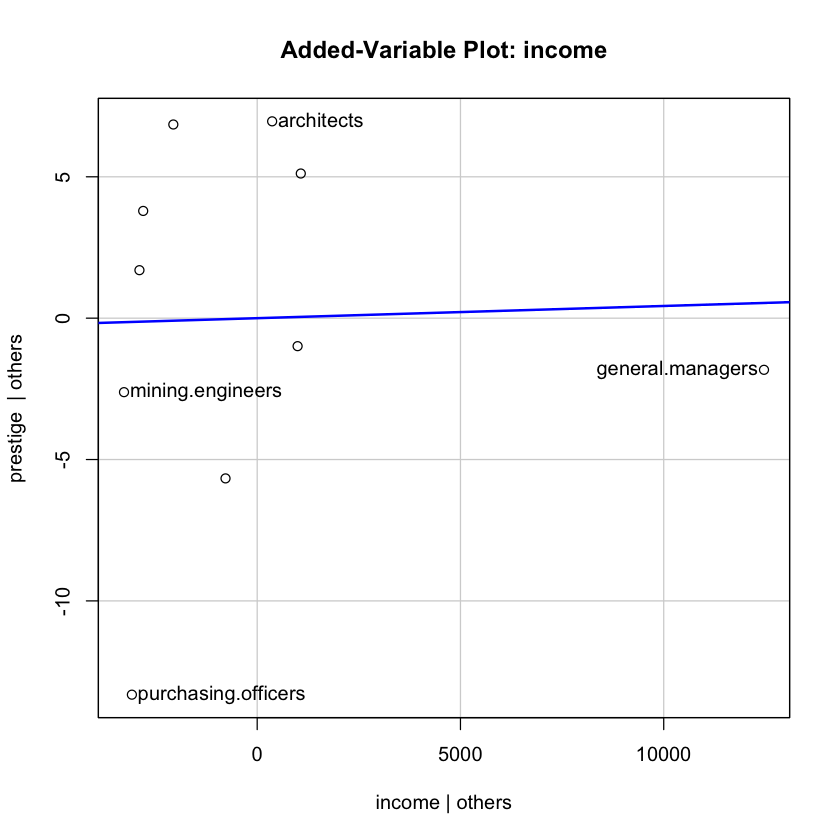

In [11]:
avPlot(m, "income")

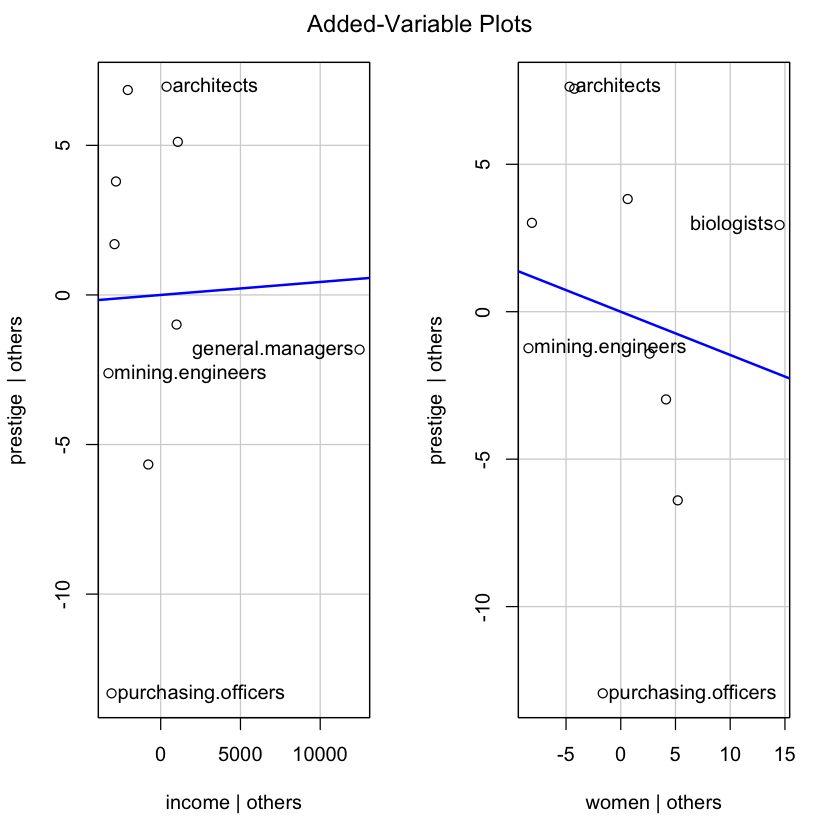

In [12]:
avPlots(m)

## 残差诊断

In [13]:
residuals(m)

gov.administrators    general.managers         accountants purchasing.officers 
          -1.033317           -2.367801           -5.633692          -13.182711 
           chemists          physicists          biologists          architects 
           3.914317            6.939521            5.069773            6.945630 
    civil.engineers    mining.engineers 
           1.823059           -2.474778

In [14]:
rstudent(m)

gov.administrators    general.managers         accountants purchasing.officers 
         -0.1423108          -1.2205280          -0.8592614          -2.8091382 
           chemists          physicists          biologists          architects 
          0.5651752           1.0565913           1.2117886           1.0746722 
    civil.engineers    mining.engineers 
          0.2740266          -0.3776865

In [15]:
rstandard(m)

gov.administrators    general.managers         accountants purchasing.officers 
         -0.1534545          -1.1799534          -0.8757863          -1.9941203 
           chemists          physicists          biologists          architects 
          0.5948308           1.0479156           1.1731706           1.0629740 
    civil.engineers    mining.engineers 
          0.2941476          -0.4031834

purchasing.officers          biologists 
                  4                   7

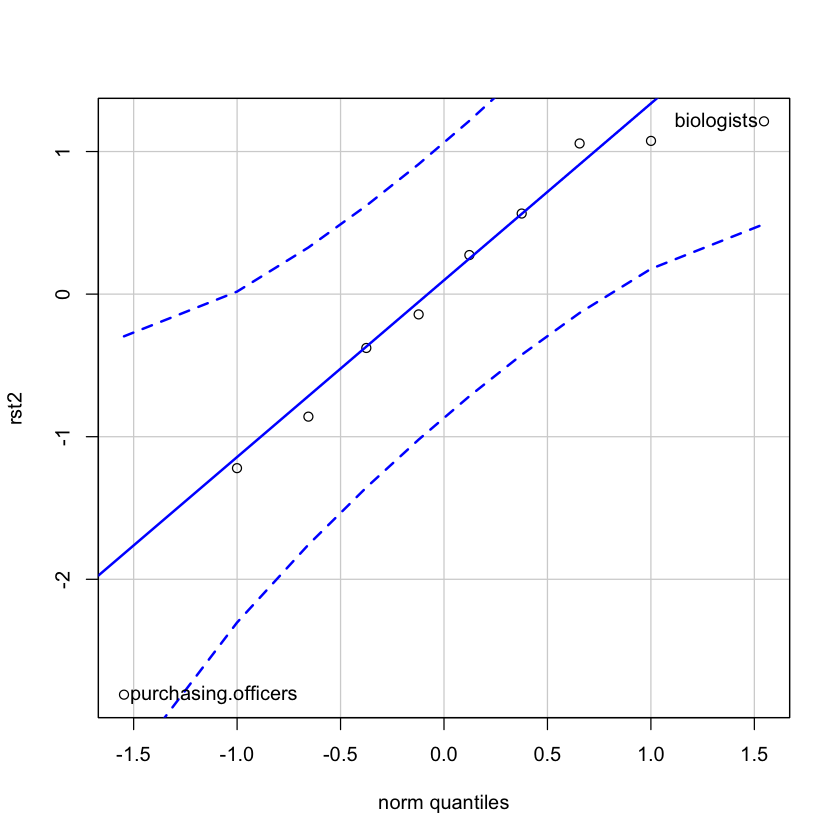

In [16]:
# normal distribution of residuals

m2 = lm(interlocks ~ sector + assets, data = Ornstein)

rst2 <-  rstudent(m)

qqPlot(rst2)

## 线性关系诊断

### 成分+残差图

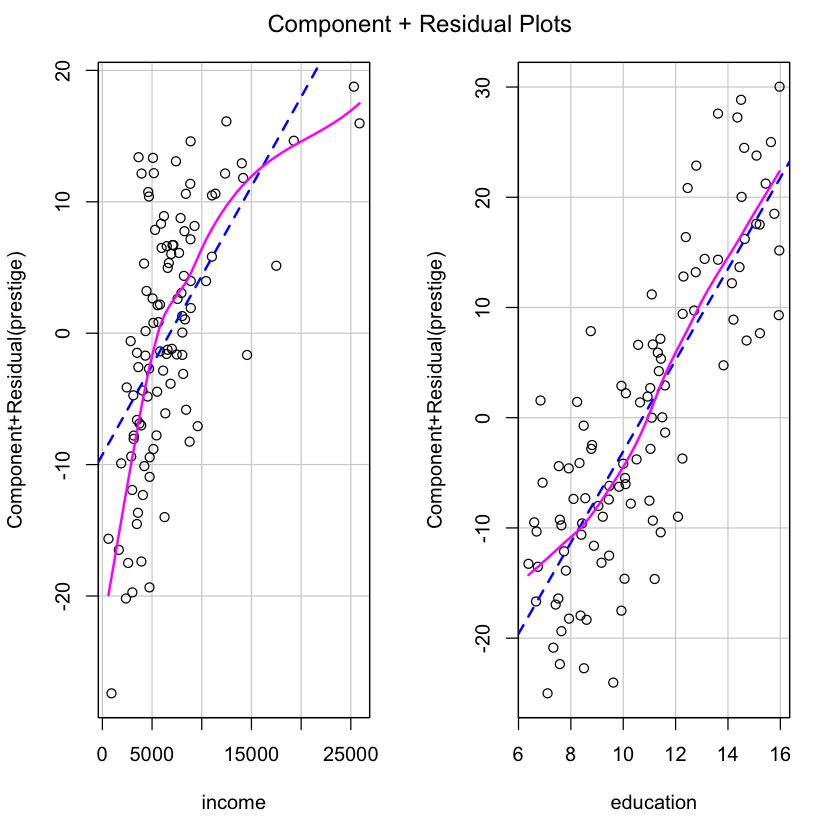

In [17]:
m3 <- lm(prestige ~ income + education, data = Prestige)

crPlots(m3)

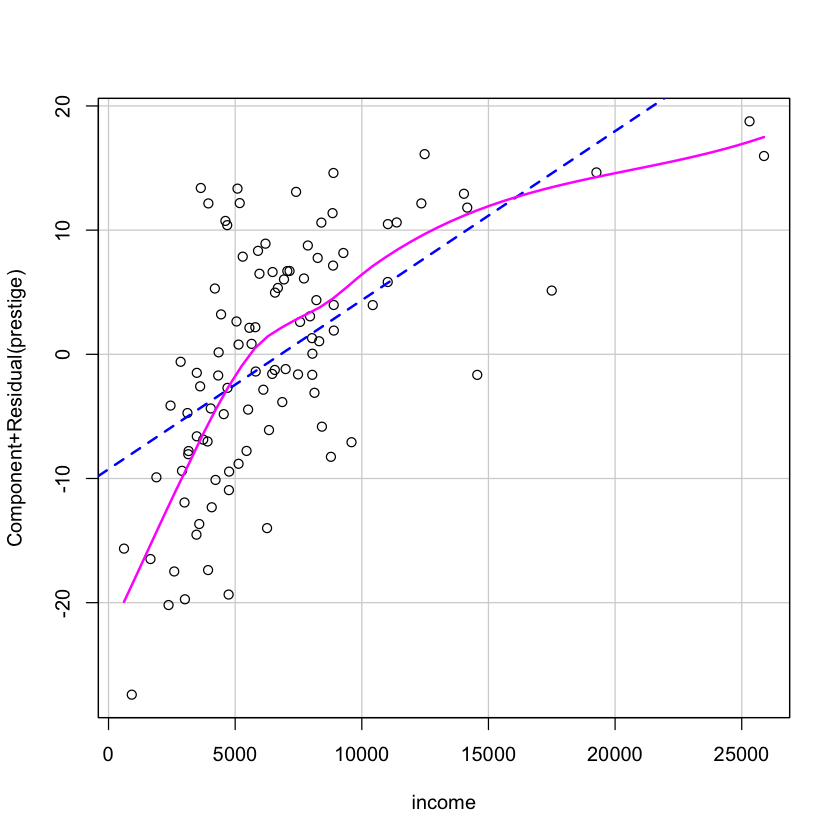

In [18]:
crPlot(m3, "income")

### 拟合不足检验（Lack of fit test）

In [19]:
library(alr3)

Vocab <- subset(Vocab, year==1989)

m4 <- lm(vocabulary ~ education, data=Vocab)

In [20]:
pureErrorAnova(m4)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
education,1,1175.1113,1175.111288,320.777351,5.165775e-62
Residuals,966,3559.4135,3.684693,NA,NA
Lack of fit,18,86.5826,4.810144,1.313055,1.706328e-01
Pure Error,948,3472.8309,3.663324,NA,NA


In [21]:
anova(lm(vocabulary ~ education, data=Vocab))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
education,1,1175.111,1175.111288,318.917,7.376984e-62
Residuals,966,3559.414,3.684693,NA,NA


In [22]:
anova(lm(vocabulary ~ factor(education), data=Vocab))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
factor(education),19,1261.694,66.404941,18.12697,1.115207e-51
Residuals,948,3472.831,3.663324,NA,NA


In [23]:
anova(lm(vocabulary ~ education, data=Vocab),
      lm(vocabulary ~ education + factor(education), data=Vocab))

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
966,3559.414,NA,NA,NA,NA
948,3472.831,18,86.5826,1.313055,0.1706328


## 综合性诊断图

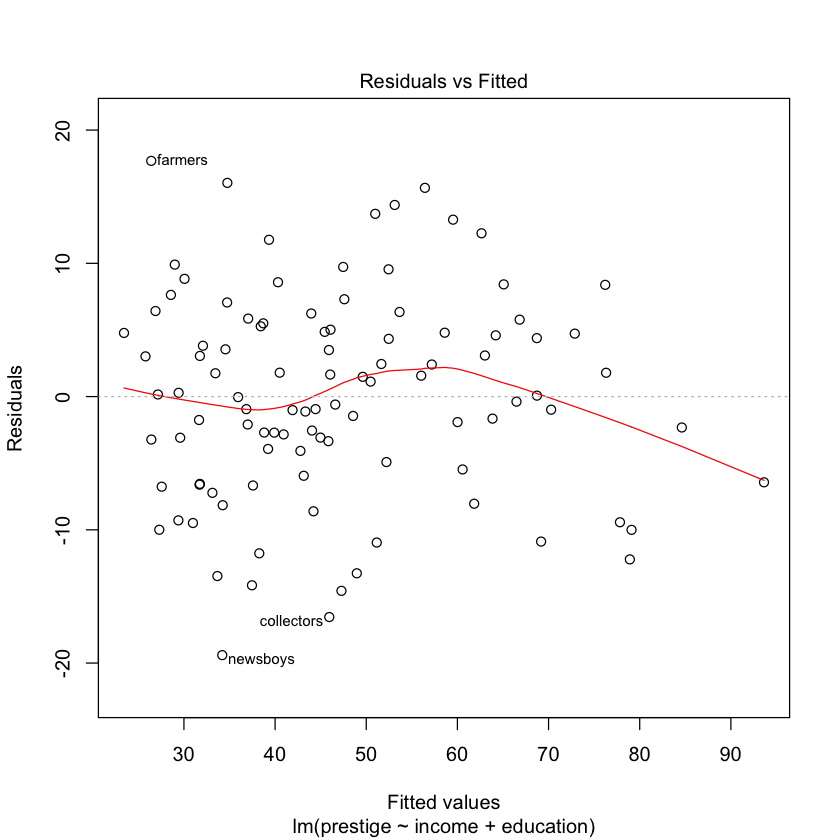

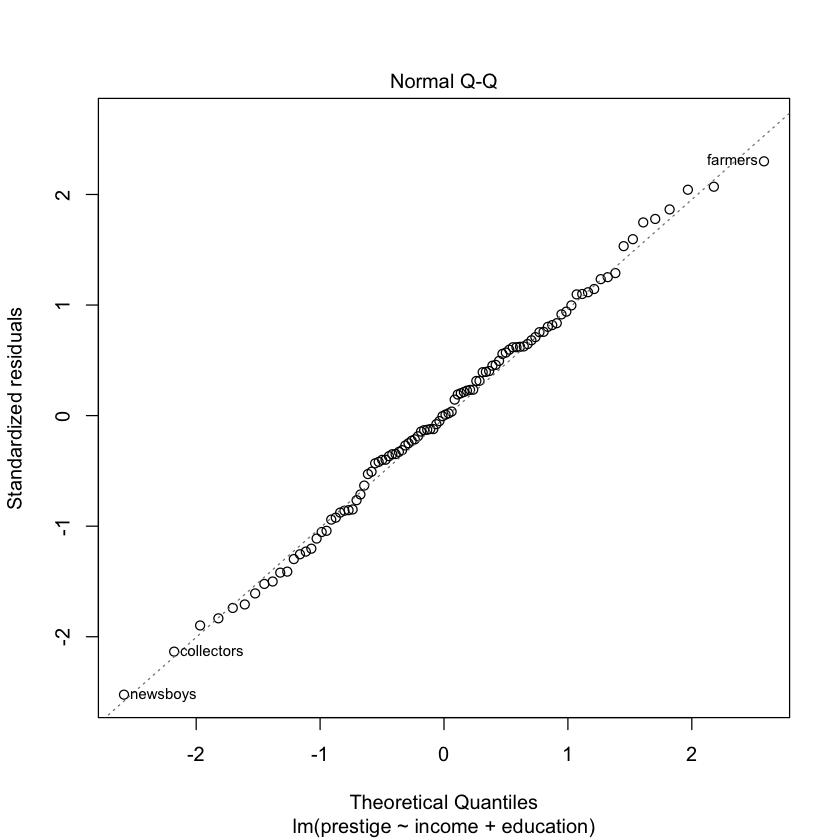

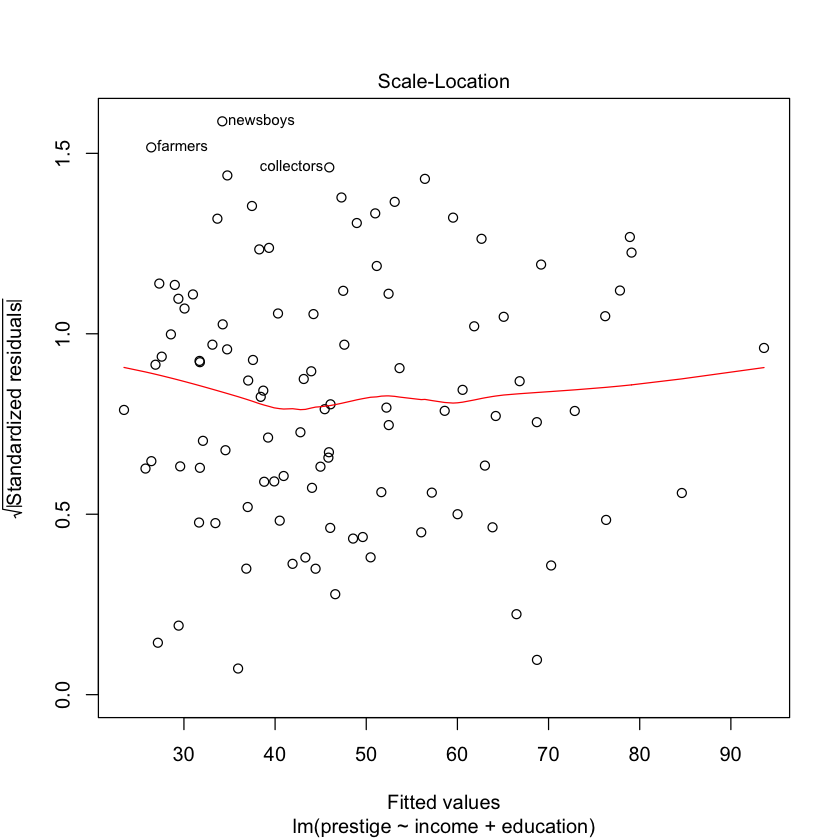

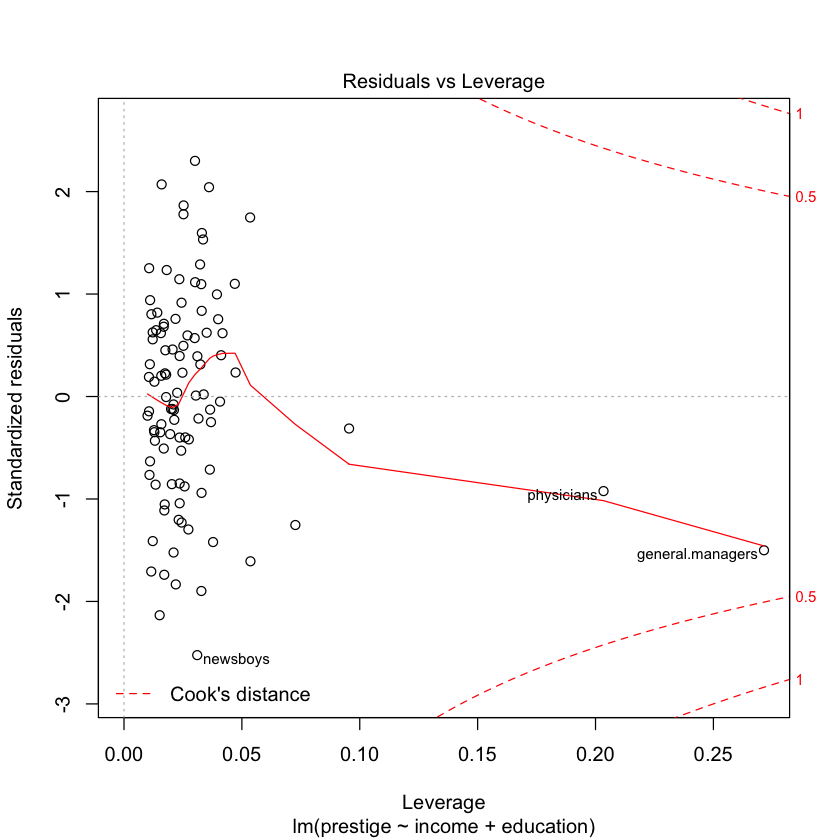

In [24]:
plot(m3)

## 等方差诊断

In [25]:
ncvTest(m3)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 0.1664679, Df = 1, p = 0.68327

In [26]:
library(lmtest)

bptest(m3)

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




	studentized Breusch-Pagan test

data:  m3
BP = 4.1838, df = 2, p-value = 0.1235


###  稳健标准误

In [27]:
coeftest(m3, vcov=hccm)


t test of coefficients:

               Estimate  Std. Error t value  Pr(>|t|)    
(Intercept) -6.84777872  3.25355462 -2.1047   0.03785 *  
income       0.00136117  0.00029942  4.5460 1.549e-05 ***
education    4.13744438  0.39588932 10.4510 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [28]:
coeftest(m3, vcov=hccm(m3, type="hc0"))


t test of coefficients:

               Estimate  Std. Error t value  Pr(>|t|)    
(Intercept) -6.84777872  3.13315246 -2.1856    0.0312 *  
income       0.00136117  0.00025458  5.3466 5.763e-07 ***
education    4.13744438  0.36970882 11.1911 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


## 共线性诊断

In [29]:
# car
vif(m3)

income education 
 1.500598  1.500598

下面的命令需要安装HH程序包

In [30]:
HH::vif(m3)

income education 
 1.500598  1.500598

下面的命令需要安装perturb程序包

In [31]:
perturb::colldiag(m3)  # condition number

Condition
Index	Variance Decomposition Proportions
          intercept income education
1   1.000 0.007     0.021  0.005    
2   4.147 0.102     0.740  0.014    
3  10.766 0.891     0.240  0.981    